# Four datasets

We load four sets of residuals. We don't know anything about the data or the model that generated the predictions. We just need to evaluate the model behaviour.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from remote url
URL = 'https://raw.githubusercontent.com/filippob/longitudinal_data_analysis/refs/heads/main/data/ML_residuals.csv'
df = pd.read_csv(URL)

# Let's just take a look
print(df)

             y     yhat_1     yhat_2     yhat_3     yhat_4
0     5.248357   5.294666  10.318325   7.290916   4.319422
1     4.990988   5.086459  10.037220   3.615507   0.651087
2     5.444085   5.374156  10.447066   3.216913   3.932290
3     5.941876   5.970024  10.909529   5.931850   2.051857
4     5.123404   5.090872  10.158315   4.687442   8.205756
..         ...        ...        ...        ...        ...
495  35.028974  35.014919  40.129279  53.772107  34.064984
496  34.301016  34.390901  39.404091  33.846163  36.679866
497  34.784590  34.816632  39.845008  19.446766  36.830134
498  34.502071  34.473512  39.553274  31.688997  33.729357
499  34.308600  34.337229  39.338226  21.530317  32.773842

[500 rows x 5 columns]


In [20]:
# Select one of the available sets
experiment = 'yhat_3'
yhat_current = df[experiment]
residuals = df['y'] - yhat_current

y = df['y']

# Zero mean, symmetrical

Mean of residuals should be around zero and the distribution should be symmetrical. However, "around zero" is not meaningful by itself, and you should at least compare it to the mean of the true values.

Mean of residuals: -0.4248787784
Mean of target: 20.0034189973


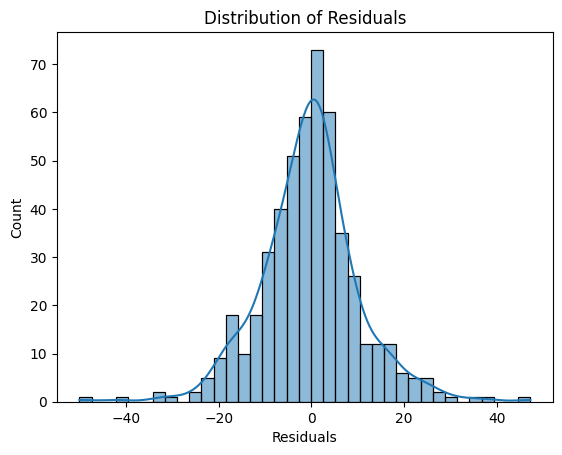

In [21]:
# We can now compute the mean and take a look at the distribution
print(f"Mean of residuals: {np.mean(residuals):.10f}")
print(f"Mean of target: {np.mean(y):.10f}")

# Plotting the distribution
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

## Are residuals normal?

We can either do a formal statistical test or visually inspect with a qq plot. If we have the model available we could do the [Breush-Pagan test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test). For this exercise however we only have the residuals, so we can do a standard, frequentist normality test. There's [many of them](https://en.wikipedia.org/wiki/Normality_test).  For simplicity let's to the [Shapiro-Wilk one](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test), implemented in [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).

Remember, the null hypothesis is that the distribution is normal. The hypothesis is:

- confirmed if p-value > 0.05 (the distribution is normal)
- rejected if p-value < 0.05 (the distribution is not normal)


In [22]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro

sw = shapiro(x=residuals)
print(sw)

ShapiroResult(statistic=np.float64(0.9701769505307788), pvalue=np.float64(1.488466307831081e-08))


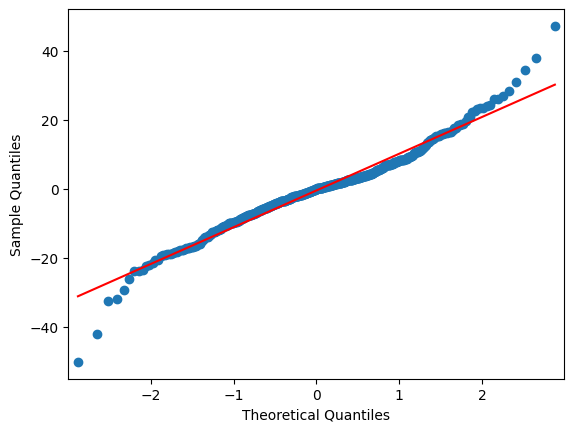

In [23]:
# QQ plot for a normal distribution
# see: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
import statsmodels.api as sm

# Create QQPlot
sm.qqplot(residuals, line='s')
plt.show()

# Dependence from fitted values

The easiest step is to plot the residuals vs the fitted values. It may have sense also to plot them against the independent variables (X) but if there's many of them it can be tedious/not meaningful. Moreover, in this exercise we don't have them :)

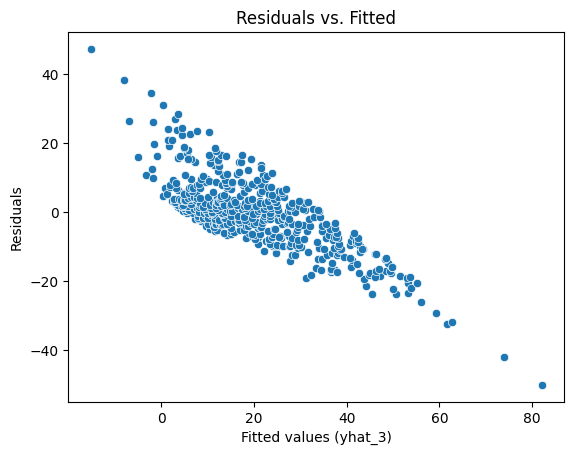

In [24]:
sns.scatterplot(x=yhat_current, y=residuals)
plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted values (" + experiment + ")")
plt.ylabel("Residuals")
plt.show()

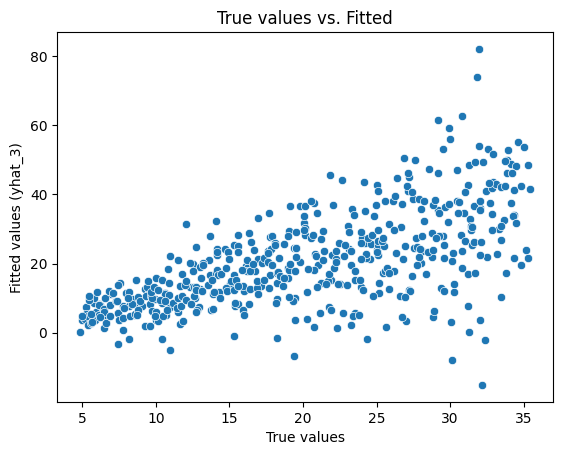

In [25]:
# Just plotting the true values against the predictions
plt.title("True values vs. Fitted")
plt.xlabel("True values")
plt.ylabel("Fitted values (" + experiment + ")")
sns.scatterplot(x=df['y'], y=df[experiment])
plt.show()

# Excercise

Take a look at the other sets of residuals. What can you discover about the models?